## USA_Fatal_Police_Shoot_Analyse

#### Burak Arslan, Derya Ekin, Yunus Emre Yılmaz

## Table of Contents:
* [Goal](#goal)
* [Data Preprocessing](#predata)
    * [Importing the Libraries](#library)
    * [Reading and Viewing the Dataset](#dataset)
* [Data Wrangling](#wrangling)
* [Data Visulaziton](#visulaziton) 
    * [Display of Mean Values of each Geographic Area and Plot With Pandas method](#vis_1) 
    * [Plot Sorted Values With Pandas Built in Method](#vis_2)
    * [Plot Sorted Values with Matplotlib](#vis_3)
    * [Preparing Most common 15 Names or Surnames of People Killed Dataframes](#Pre_15_Names)
    * [15 Most Common Names of People Killed](#vis_4)
    * [Preparing People Killed by Race Dataframes](#Pre_Race)
    * [Pie Chart Graphic of People Killed by Rac](#vis_5)
    * [Box plot of age in both genders separated by manner of death](#vis_6)
    * [Swarm plot of age in both genders separated by manner of death](#vis_7)
    * [Number of people by gender](#vis_8)
    * [Bar graph of 7 most common killing weapons](#vis_9)
    * [Bar graph of Under 25 and Above 25](#vis_10)
    * [Number of people killed by race](#vis_11)
    * [Bar Graph of 12 most dangerous cities](#vis_12)
    * [Bar Graph of 20 most dangerous states](#vis_13)
    * [Bar Graph of People Killed Having Mental Ilness or not](#vis_14)
    * [Number of Threat Types](#vis_15)
    * [Number of Flee Types](#vis_16)
* [CONCLUSION](#conc)

## Goal <a class="anchor" id="goal"></a>

We are going to be analyzing a dataset of USA_Fatal_Police_Shoot in the USA states. We are trying to find any relationship between the other features such as race, gender and age. 





## Data Preprocessing <a class="anchor" id="predata"></a>

### Importing the Libraries <a class="anchor" id="library"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
sns.set_theme(style="white", context="talk",font_scale=0.5)


### Reading and Viewing the Dataset <a class="anchor" id="dataset"></a>

In [3]:
poverty=pd.read_csv("PercentagePeopleBelowPovertyLevel.csv")
killing=pd.read_csv("PoliceKillingsUS.csv")
race=pd.read_csv("ShareRaceByCity.csv")

In [ ]:
killing2=killing.copy()

In [ ]:
poverty.head()

### Data Wrangling <a class="anchor" id = "wrangling" ></a>


### "-" means uncertain so it is replaced with "0".

In [4]:
poverty.poverty_rate = poverty.poverty_rate.replace(["-"], 0.0)
#poverty.drop(poverty.loc[poverty['poverty_rate']=="-"].index, inplace=True)

In [5]:
poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [6]:
poverty.shape

(29329, 3)

In [7]:
poverty.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


In [8]:
poverty.value_counts()

Geographic Area  City                   poverty_rate
AK               Adak city              39.3            1
OH               Geneva city            12.2            1
                 Garrettsville village  11.1            1
                 Garfield Heights city  18.7            1
                 Gann village           33.8            1
                                                       ..
KS               Wilson city            15.8            1
                 Wilsey city            20.7            1
                 Wilroads Gardens CDP   15.7            1
                 Wilmore city           7.7             1
WY               Yoder town             5.4             1
Length: 29329, dtype: int64

In [9]:
poverty.isnull().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

### Type of poverty_rate column is impracticle, so it is converted to numeric type (float) for more effective results. 

In [10]:
poverty.poverty_rate=poverty.poverty_rate.astype("float")

In [11]:
pvrty=poverty.groupby(["Geographic Area"]).poverty_rate.mean()

## Data Visulaziton <a class="anchor" id = "visulaziton" ></a>


###  Display of Mean Values of each Geographic Area and Plot With Pandas  method <a class="anchor" id = "vis_1" ></a>

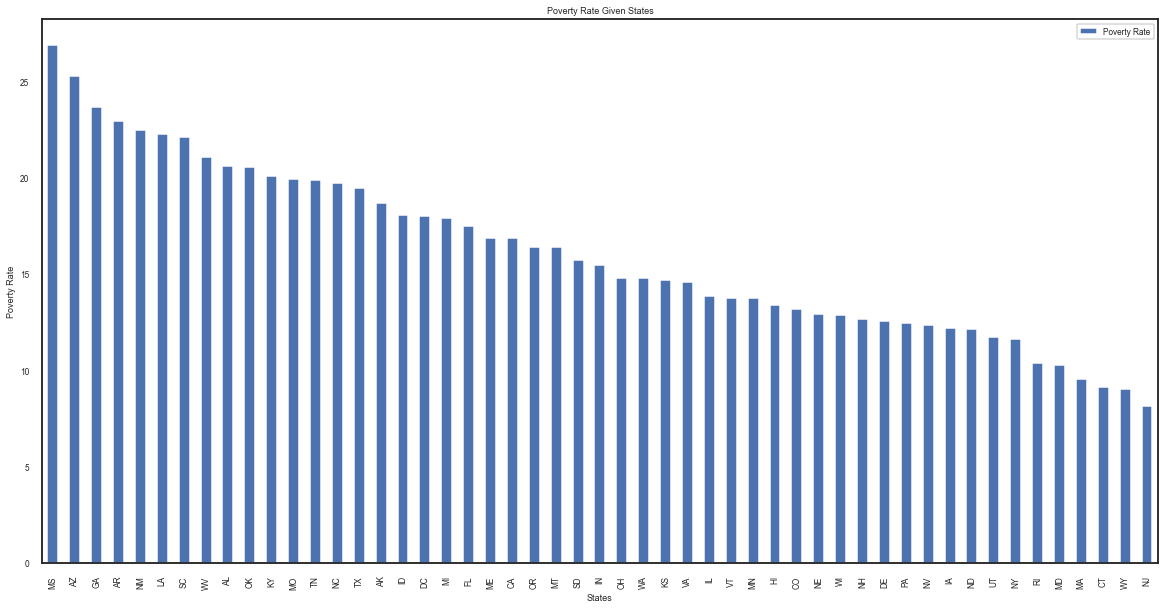

In [67]:
pvrty.plot(figsize = (20,10), kind = "bar",label="Poverty Rate")
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.legend();

### Plot Sorted Values With Pandas Built in Method <a class="anchor" id = "vis_2" ></a>

In [13]:
pvrty=poverty.groupby(["Geographic Area"]).poverty_rate.mean().sort_values(ascending=False)

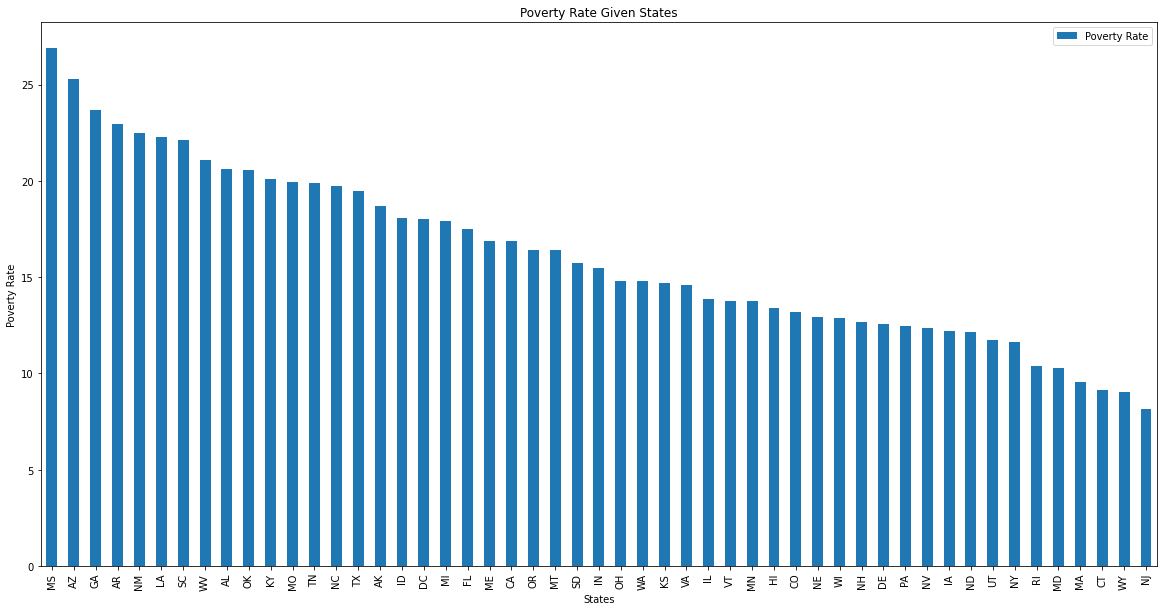

In [14]:
pvrty.plot(figsize = (20,10), kind = "bar",label="Poverty Rate")
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.legend();

*It can be seen that poverty_rate of Missisipi is the highest in all of the states. On the other hand poverty_rate of New Jersey is the lowest in all of the states.

### Plot Sorted Values with Matplotlib <a class="anchor" id = "vis_3" ></a>

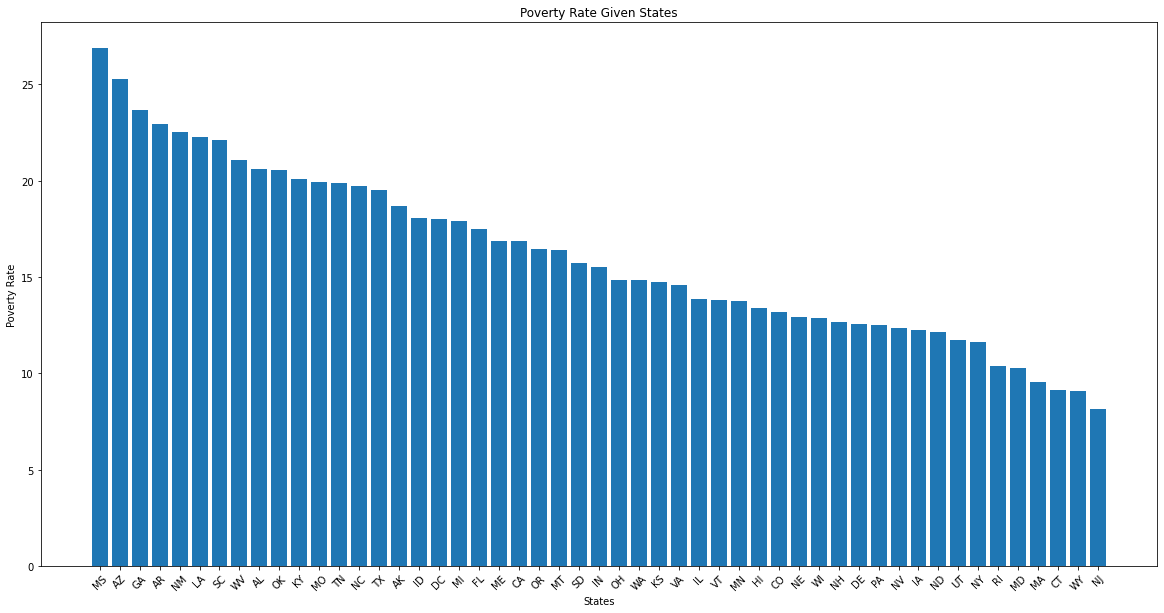

In [15]:
fig = plt.figure(figsize= (20,10))
ax=fig.add_subplot(111)
plt.bar(pvrty.index, pvrty.values)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.xticks(pvrty.index, rotation='45')
plt.show()

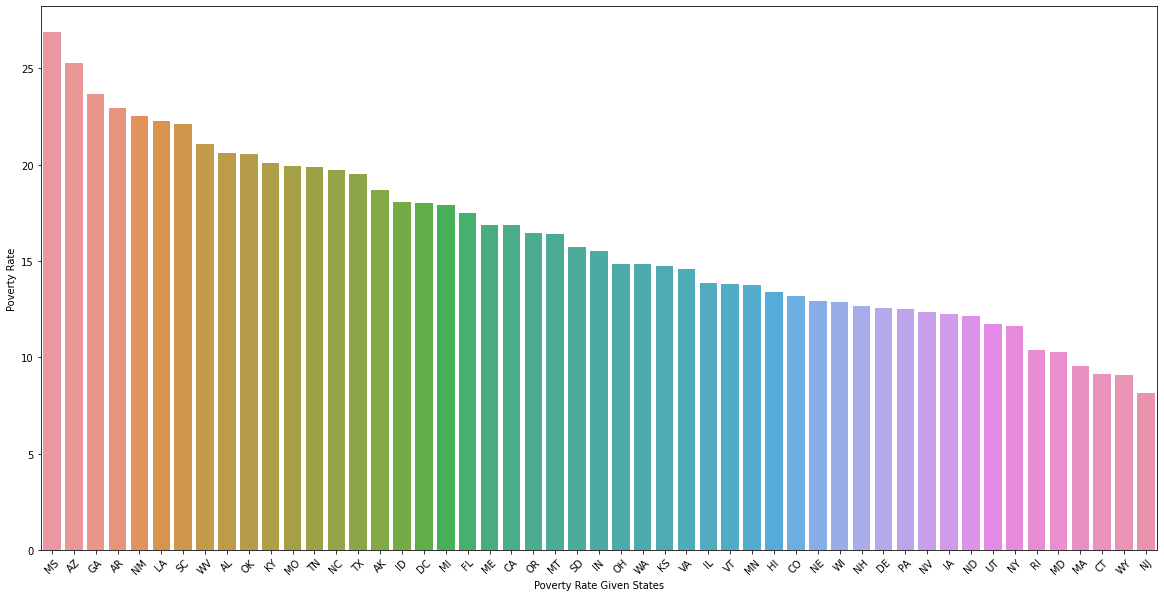

In [16]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
sns.barplot(x=pvrty.index, y=pvrty.values)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.xlabel("Poverty Rate Given States")
plt.xticks(rotation="45")
plt.show()

### Most common 15 Names or Surnames of People Killed <a class="anchor" id = "Pre_15_Names" ></a> 

In [17]:
killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [18]:
killing.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


*Results of data as to killing show that mean of people killed by age is around 36 

In [19]:
killing.name.value_counts()

TK TK                       49
Brandon Jones                2
Eric Harris                  2
TK Tk                        2
Daquan Antonio Westbrook     2
                            ..
Jose Graciano Lopez          1
India Beaty                  1
Douglas Buckley              1
Barry Kirk                   1
Fletcher Ray Stewart         1
Name: name, Length: 2481, dtype: int64

### Name of "TK TK" is Removed from Name Column

In [20]:
pairs=killing.name[killing["name"] != "TK TK"].str.split()

In [21]:
pairs

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2529      [Brian, J., Skinner]
2530      [Rodney, E., Jacobs]
2532    [Dennis, W., Robinson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2486, dtype: object

In [22]:
from collections import Counter
import collections
isim=[]
soyisim=[]
for i in pairs:
    if len(i)==2:
        isim.append(i[0])
        soyisim.append(i[-1])
    elif len(i)==3:
        isim.append(i[0]+" "+i[1])
        soyisim.append(i[-1])
    elif len(i)==4:
        isim.append(i[0]+" "+i[1]+" "+i[2])
        soyisim.append(i[-1])


*People who have only one single name are considered in the same list; 
other people who have more than one name are considered in a different list.  

In [23]:
isim_say=Counter(isim)
isim1=isim_say.most_common()

In [24]:
soyisim_say=Counter(soyisim)
soy=soyisim_say.most_common()

In [25]:
namedf=pd.DataFrame(isim1,columns=["isim","Tekrar"])

In [26]:
namedf=namedf.iloc[:16]

In [27]:
namedf

,isim,Tekrar
0,Michael,47
1,Joseph,24
2,David,23
3,Joshua,23
4,Robert,22
5,William,22
6,Christopher,22
7,Daniel,20
8,Richard,19
9,John,18


*It can be inferred from data as to killing that name of Micheal is more common than other names.

### 15 Most Common Names of People Killed <a class="anchor" id = "vis_4" ></a> 

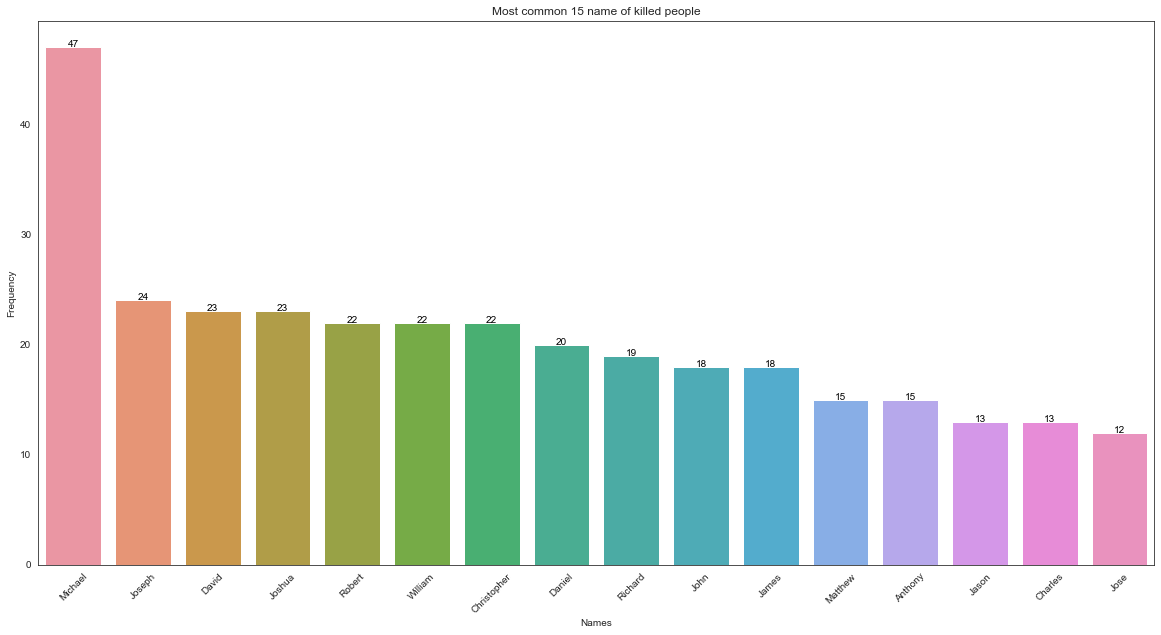

In [50]:
fig = plt.figure(figsize=(20,10))
g=sns.barplot(x=namedf.isim,y=namedf.Tekrar)
plt.xlabel("Names")
plt.title("Most common 15 name of killed people")
plt.ylabel("Frequency")
plt.xticks(rotation="45")
for index, row in namedf.iterrows():
    g.text(row.name, row.Tekrar, round(row.Tekrar, 2), color='black', ha="center")
plt.show()


In [29]:
killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## People Killed by Race <a class="anchor" id = "Pre_Race" ></a> 

In [51]:
killing.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [52]:
killing.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

### Missing value on race column.

In [53]:
killing.dropna(subset=['race'],inplace=True)

In [54]:
killing.race.isnull().sum()

0

In [55]:
killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Graphic of Pie Chart <a class="anchor" id = "vis_5" ></a> 

Text(0.5, 1.0, 'Killed People According to Races')

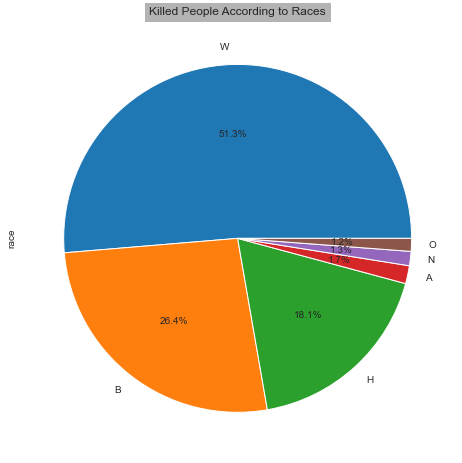

In [62]:
killing.race.value_counts().plot(kind = "pie",autopct='%.1f%%', figsize =(12,8) )
plt.title("Killed People According to Races", bbox={'facecolor':'0.7', 'pad':5})

*It can be seen in pie chart that race of white forms %51.3 in all races.   

### Box plot of age in both genders separated by manner of death <a class="anchor" id = "vis_6" ></a> 

In [ ]:
killing.head()

In [63]:
killing.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

<Figure size 1008x576 with 0 Axes>

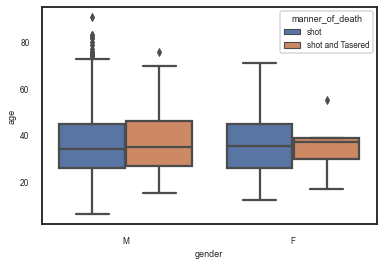

In [68]:
fig=plt.figure(figsize=(14,8))
fig,a=plt.subplots(1,1)
sb.boxplot(x="gender",y="age",hue="manner_of_death",data=killing)
sb.color_palette("muted",12)
sb.set_palette("muted",12)

*When we examine the box plot, it can be inferred that the rate of gender of male is almost the same in terms of "shot" and "shot and tasered"

*According to the data the police do not prefer to kill females beyond 40 years old by electroshocking.



### Swarm plot of age in both genders separated by manner of death <a class="anchor" id = "vis_7" ></a> 

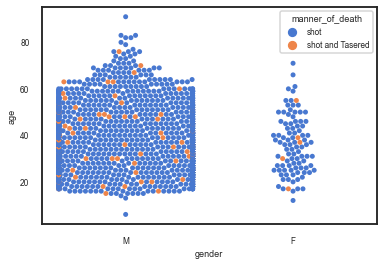

In [69]:
ax=sb.swarmplot(x="gender",y="age",hue="manner_of_death",data=killing)

*When we compare male and female data, the rate of people who were killed by electroshocking is lower than rate of people who were killed only by shot.


### Number of people by gender <a class="anchor" id = "vis_8" ></a>  

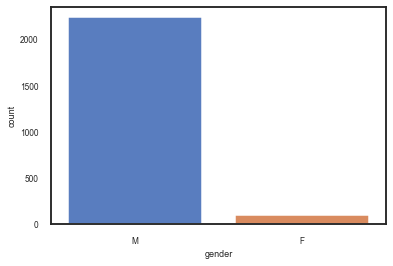

In [70]:
import seaborn as sns
sns.set_style("white")
ax=sns.countplot(x="gender", data=killing)

### Bar graph of 7 most common killing weapons <a class="anchor" id = "vis_9" ></a> 

In [73]:
weapons

gun                                 1289
knife                                338
unarmed                              170
vehicle                              165
toy weapon                           102
                                    ... 
fireworks                              1
contractor's level                     1
baseball bat and fireplace poker       1
air conditioner                        1
bayonet                                1
Name: armed, Length: 67, dtype: int64

In [74]:
weaponsdf

,Frequency
gun,1289
knife,338
unarmed,170
vehicle,165
toy weapon,102
undetermined,101
machete,17


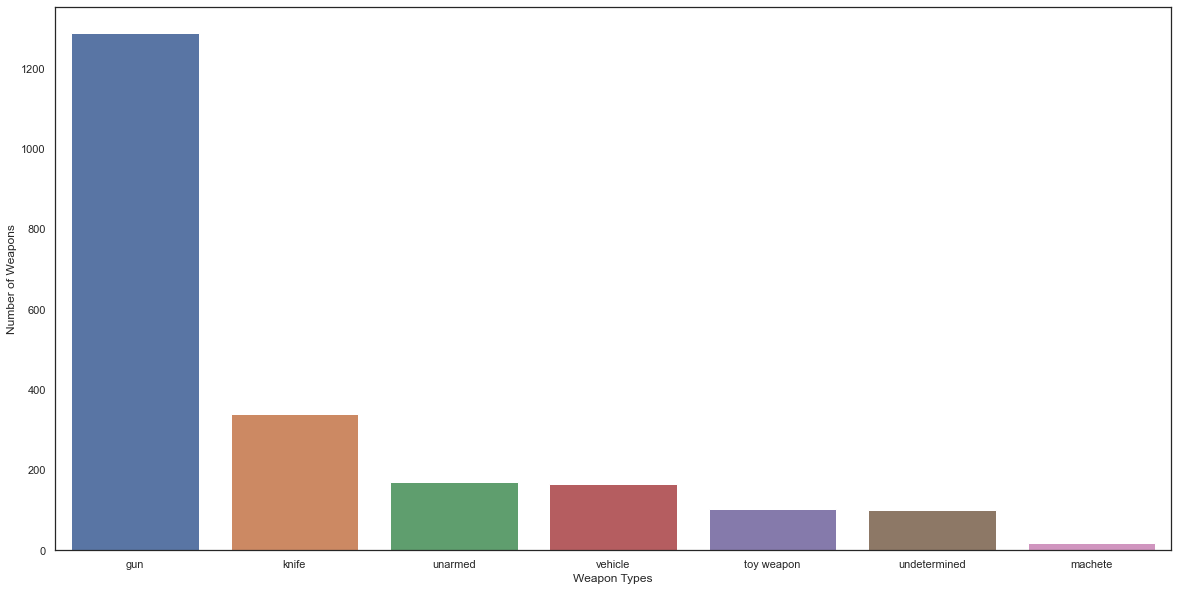

In [99]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#weapons=killing.armed.value_counts().sort_values(ascending=False)
weaponsdf=pd.DataFrame(killing.armed.value_counts(),columns=["armed"])
weaponsdf=weaponsdf.iloc[:7]
weaponsdf
weaponsdf=weaponsdf.rename(columns={"armed": "Frequency"})

sns.set_style("white")
fig=plt.figure(figsize=(20,10))
g=sns.barplot(x=weaponsdf.index,y=weaponsdf.Frequency,data=weaponsdf)
plt.xlabel("Weapon Types")
plt.ylabel("Number of Weapons")
sb.set()

*It is obvious that people carrying gun are the most type of armed people who were killed by the police. 
It can also be seen that people not armed have been killed by the police. Police tend to kill people who attempt crime.

### Bar graph of Under 25 and Above 25 <a class="anchor" id = "vis_10" ></a> 

In [100]:
killing.age

0       53.0
1       47.0
2       23.0
3       32.0
4       39.0
        ... 
2523    25.0
2525    39.0
2528     NaN
2533    28.0
2534    32.0
Name: age, Length: 2340, dtype: float64

In [101]:
killing.dropna(subset=["age"],inplace=True)

In [102]:
killing.age.isnull().sum()

0

In [103]:
killing["age"]=killing.age.map(lambda
                               x:"above25" if x>25  else "beneath25")

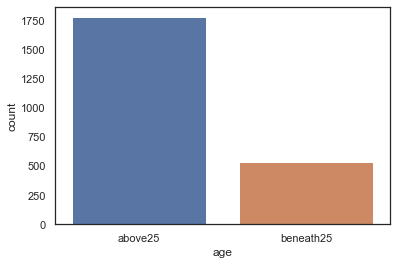

In [104]:
sns.set_style("white")
ax=sns.countplot(x="age", data=killing)

### Number of people killed by race <a class="anchor" id = "vis_11" ></a>

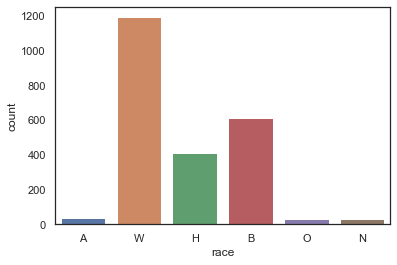

In [106]:
sns.set_style("white")
ax=sns.countplot(x="race", data=killing)

*Either the number of white people killed is more than others or the number of white people killed is more than other races. 

### Bar Graph of 12 most dangerous cities <a class="anchor" id = "vis_12" ></a>

In [119]:
citycprdf=pd.DataFrame(killing2.city.value_counts().iloc[:12])

In [120]:
citycprdf                                                             

,city
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Miami,18
Austin,18
St. Louis,15


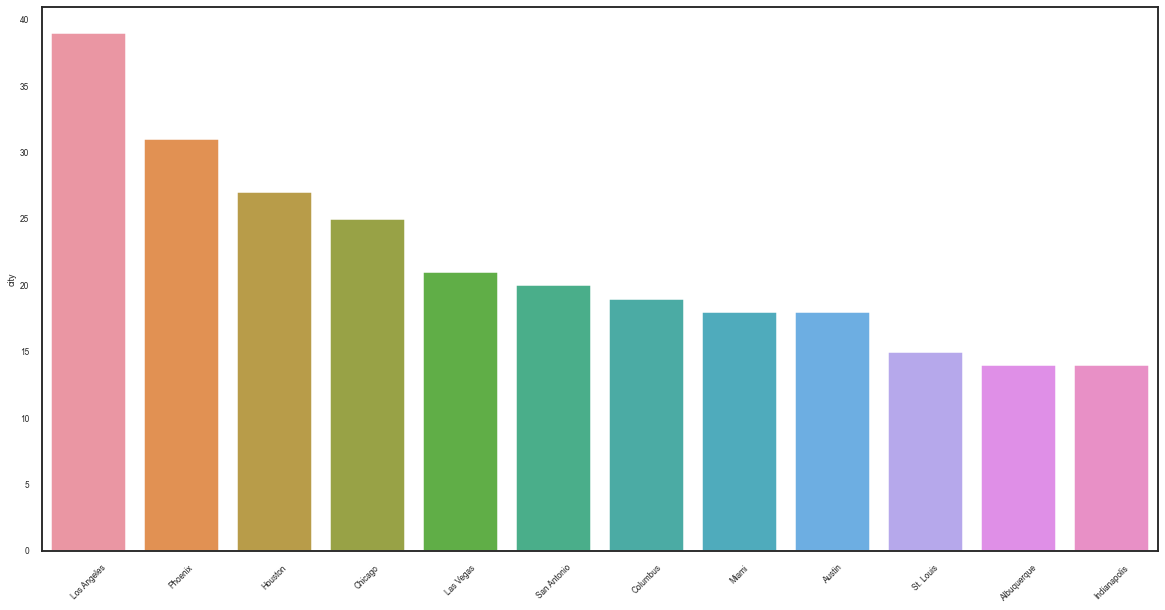

In [121]:
sns.set_style("white")
figure=plt.figure(figsize=(20,10))
ax=sns.barplot(x=citycprdf.index,y=citycprdf.city, data=citycprdf)
plt.xticks(rotation="45")
plt.show()

*It can be seen in the graph that Los Angeles is the most dangerous city when compared to other cities.

### Bar Graph of 20 most dangerous states <a class="anchor" id = "vis_13" ></a>

In [122]:
states=killing2.state.value_counts()
statesdf=pd.DataFrame(states)
statesdf=statesdf.iloc[:20]

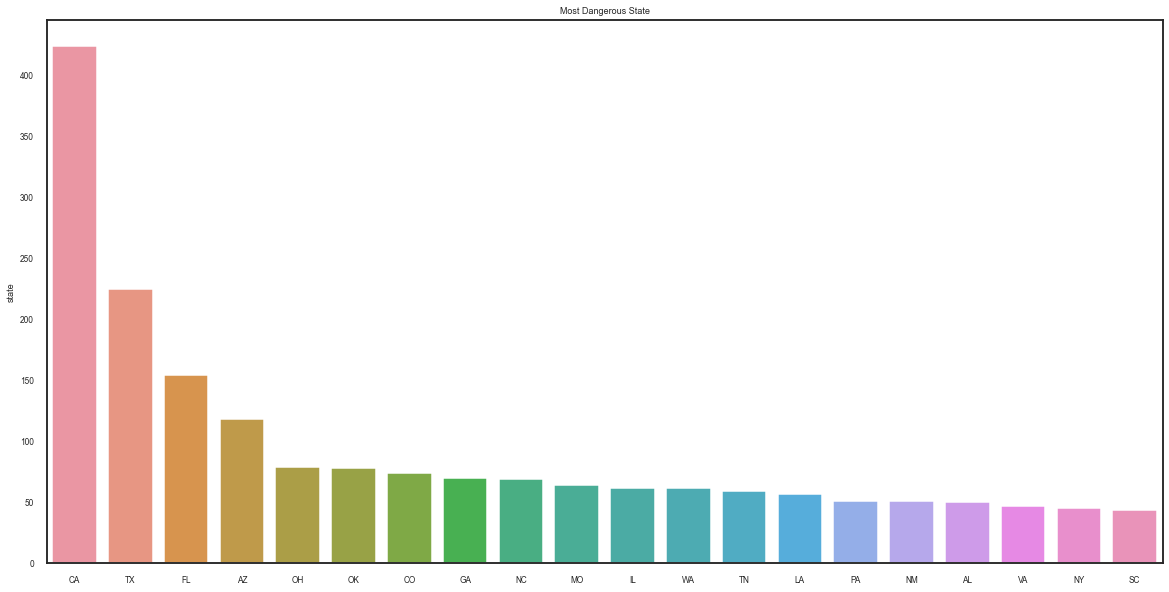

In [123]:
sns.set_style("white")
figure=plt.figure(figsize=(20,10))
ax=sns.barplot(x=statesdf.index,y=statesdf.state, data=statesdf)
plt.title("Most Dangerous State")

plt.show()

*Despite the common belief that the highest rate of crime is in Texas, analysis shows that California  takes over this notoriety.  

### Bar Graph of People Killed Having Mental Ilness or not <a class="anchor" id = "vis_14" ></a>

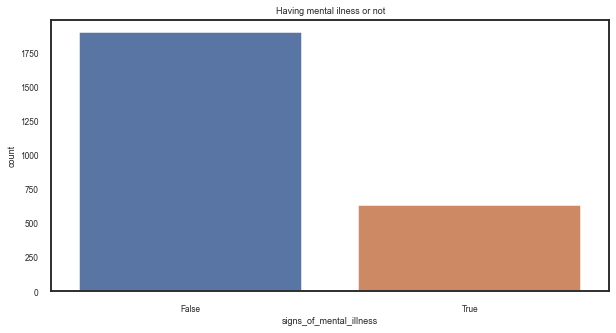

In [124]:
figure=plt.figure(figsize=(10,5))
plt.title("Having mental ilness or not")
ax=sns.countplot(x="signs_of_mental_illness", data=killing)
plt.show()

*It can be said that plenty number of people killed by the police don't have mental ilnesses.

### Number of Threat Types <a class="anchor" id = "vis_15" ></a>

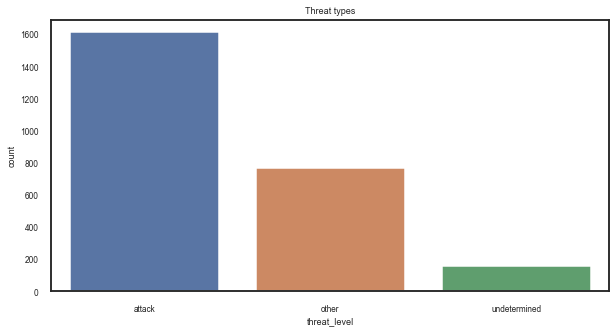

In [125]:
figure=plt.figure(figsize=(10,5))
plt.title("Threat types")
ax=sns.countplot(x="threat_level", data=killing)
plt.show()

*When data is analyzed it can be seen that people killed by the police tend to protect themselves.

### Number of Flee Types <a class="anchor" id = "vis_16" ></a>

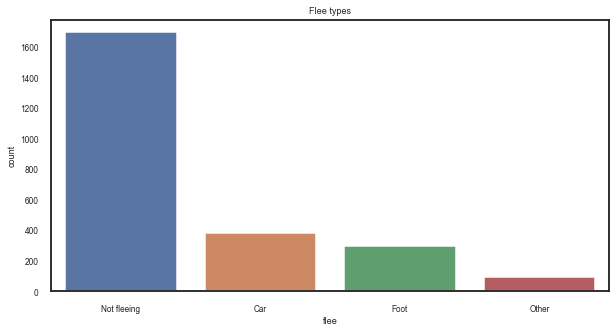

In [126]:
figure=plt.figure(figsize=(10,5))
plt.title("Flee types")
ax=sns.countplot(x="flee", data=killing)
plt.show()

*It can be observed that people killed by the police don't attempt to flee.

## CONCLUSION <a class="anchor" id = "conc" ></a>

Firstly, data concerning poverty rate are analyzed by state. It can be understood that the poverty rate of CA,TX,FL,AZ 
is quite high when they are compared to other cities. 
In addition, when data as to killing are observed, it can be inferred  CA,TX,FL,AZ are in the most 4 dangerous cities of all the cities in the USA.
Therefore, the poverty rate affects cities in terms of dangerousness.

Secondly, whether the police apply positive discrimination or not is analyzed; however, it cannot be inferred any results about discrimination owing to
insufficient data for the number of males and females who have committed crimes. 

